## Analyse exploratoire série temporelle - fct_respiratory

In [30]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt

In [8]:
#read data 

fct_respiratory = pd.read_csv('fct_respiratory.csv')
dim_patient = pd.read_csv('dim_patient.csv')
dates = dim_patient[['id_patient','date_transplantation']]

#merge two dataframes per id_patient

df = pd.merge(fct_respiratory, dates, on='id_patient')
df['timestamp'] = df['date_transplantation'] + '-' +df['time']

#remove time = 0 

df = df[df['time'] != '0']

df['timestamp'] = pd.to_datetime(df['timestamp'])

In [22]:
df_melt = pd.melt(df, id_vars=['id_patient','timestamp'], value_vars=['etco2','eto2','fico2','fin2o','fr','fr_ecg','fio2','mac','peeptotal','pmax','pmean','pplat','rr_co2','spo2','svo2__m','vt'])

In [40]:
def plot_respiratory(id_patient):
    print 'Displaying respiratory measures for patient # {}'.format(id_patient)
    g = sns.FacetGrid(df_melt[df_melt['id_patient'] == id_patient], col="variable", col_wrap=4, sharey=False)
    g = g.map(plt.plot, "timestamp", "value")

Displaying respiratory measures for patient # 381


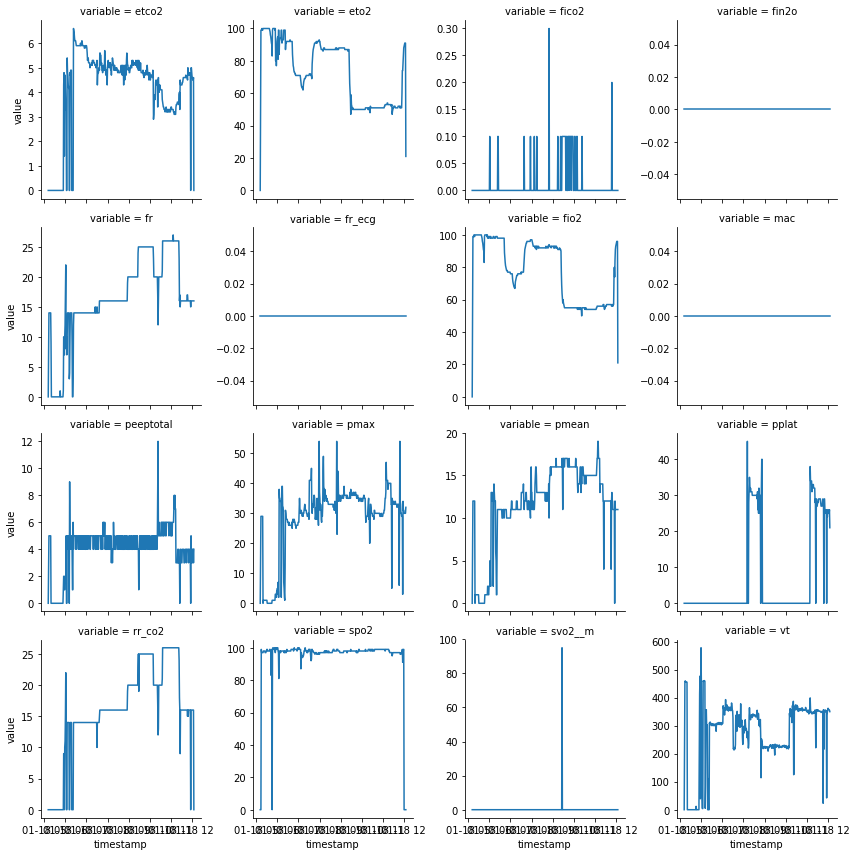

In [41]:
plot_respiratory(381)